In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [17]:
df = pd.read_csv("Iris.csv")

In [18]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [21]:
# Drop the Id column if present
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

In [22]:
# Features and labels
x = df.drop('Species', axis=1)
y = df['Species']

In [23]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
# Normalize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [25]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [26]:
# 2. & 3. Try different K values
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.2f}")

K=1, Accuracy=0.97
K=2, Accuracy=1.00
K=3, Accuracy=1.00
K=4, Accuracy=1.00
K=5, Accuracy=1.00
K=6, Accuracy=1.00
K=7, Accuracy=1.00
K=8, Accuracy=1.00
K=9, Accuracy=1.00
K=10, Accuracy=1.00


In [27]:
# 4. Confusion Matrix for best K
best_k = k_values[np.argmax(accuracies)]
print(f"\nBest K = {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train, y_train)
y_pred_best = knn_best.predict(x_test)


Best K = 2


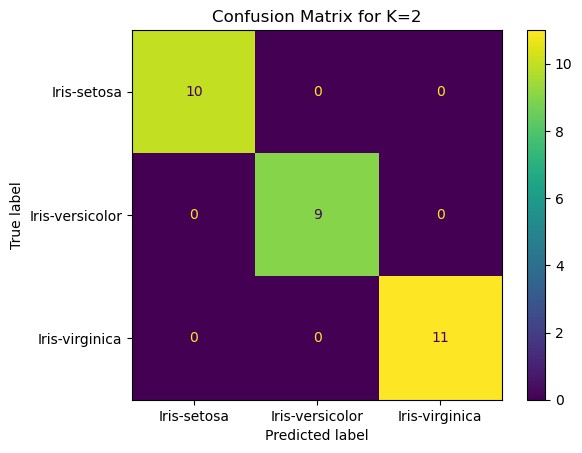

In [28]:
cm = confusion_matrix(y_test, y_pred_best, labels=knn_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot()
plt.title(f"Confusion Matrix for K={best_k}")
plt.show()

In [29]:
# 5. Visualize Decision Boundary using PCA (2D projection)

# Encode labels as integers for contour plotting
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [30]:
# PCA projection
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x_scaled)

In [31]:
# Re-train on PCA-reduced data
x_train_2d, x_test_2d, y_train_2d, y_test_2d = train_test_split(x_reduced, y_encoded, test_size=0.2, random_state=42)
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(x_train_2d, y_train_2d)

KNeighborsClassifier(n_neighbors=2)

In [32]:
# Meshgrid
h = 0.02
x_min, x_max = x_reduced[:, 0].min() - 1, x_reduced[:, 0].max() + 1
y_min, y_max = x_reduced[:, 1].min() - 1, x_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

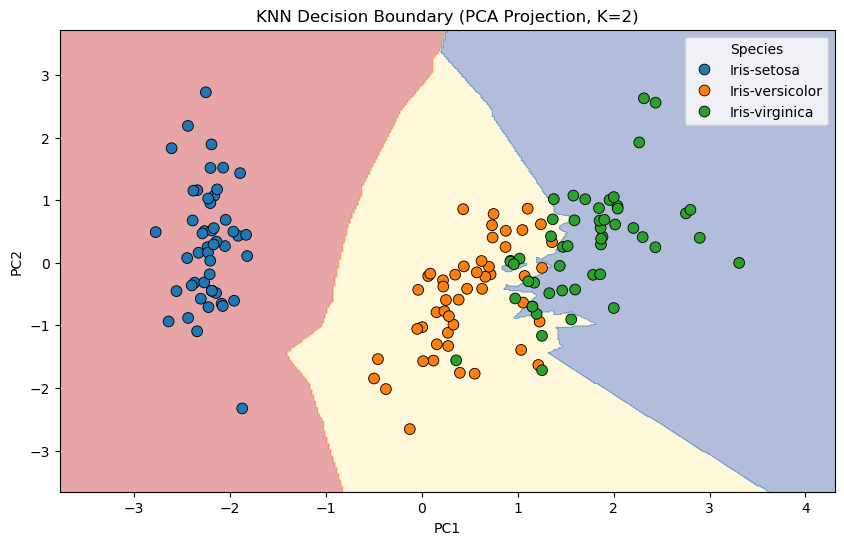

In [33]:

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Plot actual points (with original labels for legend)
sns.scatterplot(x=x_reduced[:, 0], y=x_reduced[:, 1], hue=y, s=60, edgecolor='k')
plt.title(f"KNN Decision Boundary (PCA Projection, K={best_k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Species')
plt.show()